# Capstone Project 1: Data Storytelling

Data source: https://www.yelp.com/dataset.

In this exploration of the yelp restaurants, we will look at the distribution of restaurants across ratings and standings from multiple angles:
1. General distribution of all restaurants across standing categories and star ratings
2. Restaurant categories and distributions within certain categories
3. Changes in ratings over time of randomly selected restaurants in each standing category
4. Restaurant attributes and distributions within certain attributes
5. Restaurant locations, restaurant density, and location based distributions

In [1]:
# Read the stored dataframes from Capstone Project 1: Data Wrangling in file data_wrangling
%store -r goodr
%store -r modr
%store -r poorr
%store -r goodr_checkins
%store -r modr_checkins
%store -r poorr_checkins
%store -r rests
%store -r goodrv
%store -r modrv
%store -r poorrv

In [10]:
# Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")

## I. Distributions of Restaurant Standings and Ratings

Here, I start exploring yelp data with the restaurants having been triaged into 3 standing categories after the data wrangling exercise. Those with 4-5 stars are assigned 'Good' standing, those with 2.5-3.5 stars are assigned 'Moderate' standing, and those with 1-2 stars are assigned 'Poor' standing. I start by counting the number of restaurants in each standing category, as well as in each star rating, and visualizing the results with bars.

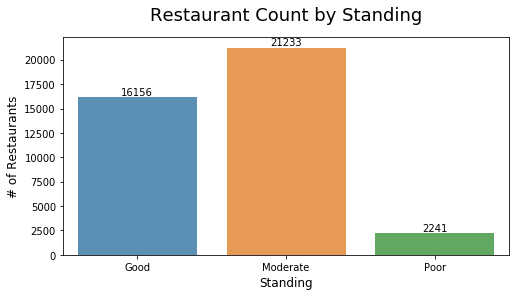

In [262]:
# Count the number of restaurants in each standing category - good standing, moderate standing, and poor standing.
# Get the distribution of the standings
x = rests['standing'].value_counts()
x = x.sort_index()

# Show the counts of observations in each categorical bin using bars in a count plot.
plt.figure(figsize=(8,4))
ax = sns.countplot(x='standing',data=rests,alpha=0.8)
plt.title("Restaurant Count by Standing",size=18,y=1.05)
plt.ylabel('# of Restaurants', fontsize=12)
plt.xlabel('Standing', fontsize=12)

# Adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show();

In the dataset, there are the most number of restaurants in moderate standing having 2.5-3.5 stars, with significantly (8-10 times) more moderate to good restaurants than poor restaurants.

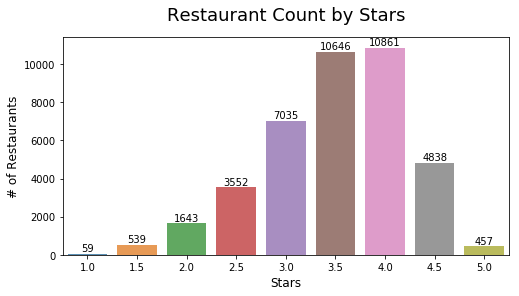

In [263]:
# Get the distribution of the ratings
x = rests['stars'].value_counts()
x = x.sort_index()

# plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Restaurant Count by Stars",size=18,y=1.05)
plt.ylabel('# of Restaurants', fontsize=12)
plt.xlabel('Stars', fontsize=12)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show();

Looking closer, the dataset contains the most number of restaurants with 3.5-4 stars. Although only 1 percent of the restaurants have 5 star ratings, a mere 0.1% have 1 star ratings! It appears that performing extremely well as a restaurant is easier to achieve than performing extremely poorly. For the most part, people run pretty okay restaurants. That's good news for future restauranteurs.

## II. Distributions of Restaurant Standings by Categories

Now that we have the distribution of all restaurants by their ratings, let's look at the same distribution again, but this time within each restaurant category. Will they all look like the distribution of the general population, with the most number of restaurants in moderate standing? Or might they look different? First, let's look at what categories are available and visualize their counts with bars.

There are  7526  different types of restaurants in Yelp!


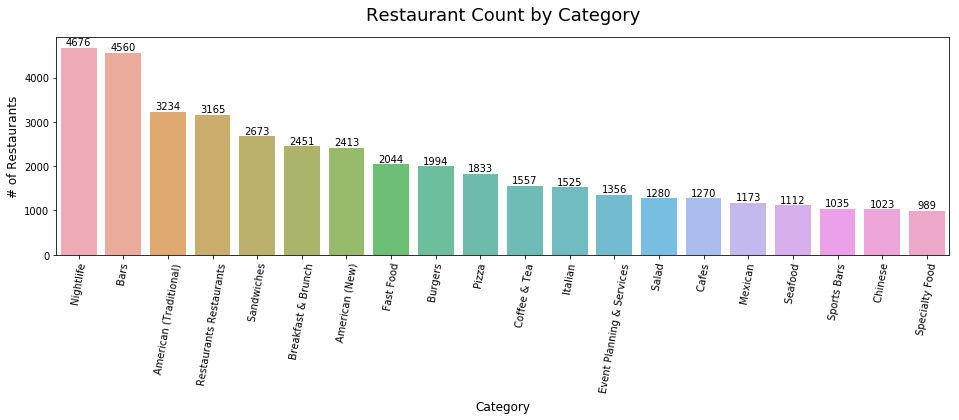

In [304]:
# What types of restaurants are there?
rest_cats =' '.join(rests['categories'])

# Transform the categories column by splitting the values by comma, and put it into a new dataframe.
cats = pd.DataFrame(rest_cats.split(','),columns=['category'])

# Count the number of occurences of each category.
x = cats.category.value_counts()
print("There are ",len(x)," different types of restaurants in Yelp!")
x = x.sort_values(ascending=False)

# Omit the first two category values of Food and Restaurants, and show just the top 20 categories.
y = x.iloc[2:22]

# Plot restaurant count by category.
plt.figure(figsize=(16,4))
ax = sns.barplot(y.index, y.values, alpha=0.8)
plt.title("Restaurant Count by Category",fontsize=18,y=1.05)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# of Restaurants', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Add text labels of the counts above the bars in the plot.
rects = ax.patches
labels = y.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show();

Next, we can look into some categories of interest and its distribution of restaurant standings.

In [296]:
# Create user defined function that returns list of dataframes filtered by categories
def category_filter(gr,mr,pr,cats):
    data_list = list()
    for c in cats:
        data_list.append(pd.concat([gr[gr.categories.str.contains(c)], 
                                    mr[mr.categories.str.contains(c)], 
                                    pr[pr.categories.str.contains(c)]]))
    return data_list


In [318]:
# Create list of categories I am interested in visualizing
catlist = ['American','Chinese','Vegetarian','Vegan',
           'Japanese','Burger','Bars','Cocktail','Dessert',
           'Mexican','Pizza','Truck','Tacos','Steakhouse',
           'Barbeque','Thai','Brunch','Juice','Salad','Coffee',
           'Sushi','Sandwiches','Ramen']

# Call function for list of dataframes filtered by categories.
dfs = category_filter(goodr,modr,poorr,catlist)

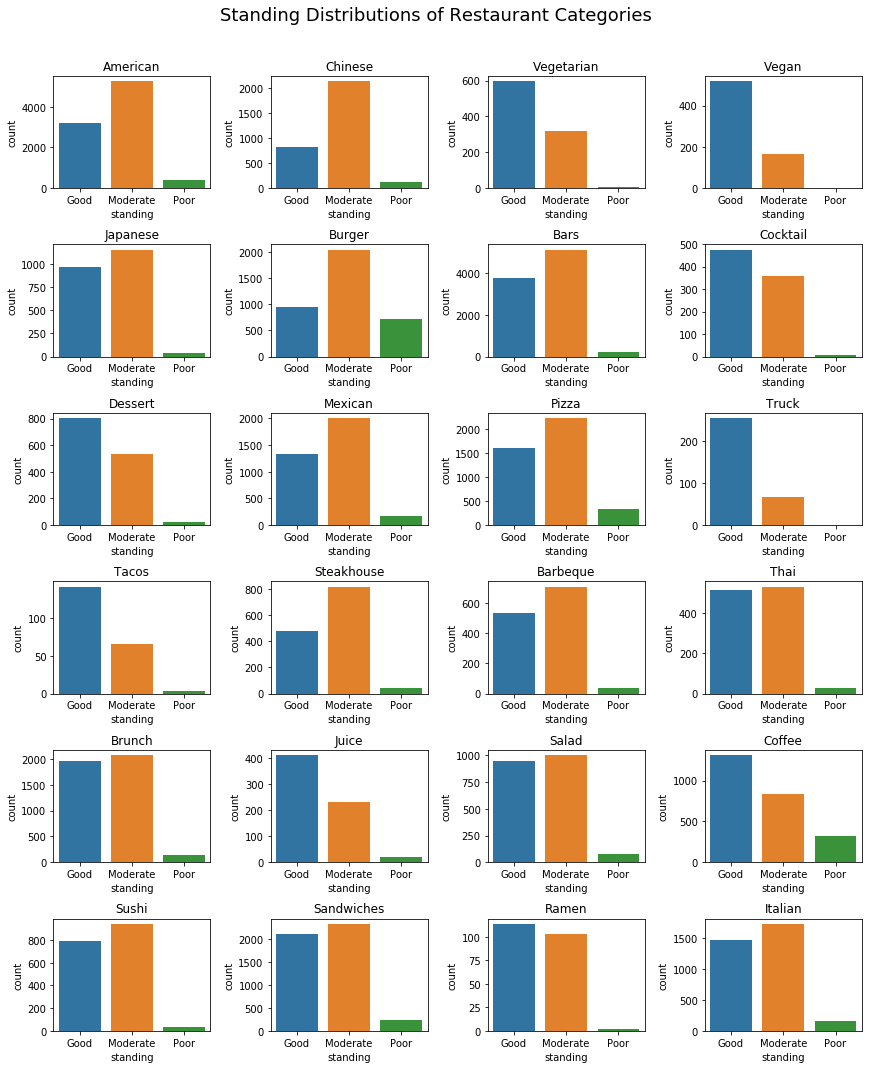

In [396]:
# Plot the restaurant counts across standing categories within each restaurant category.
fig1,axes1 = plt.subplots(6,4,figsize=(12,14),constrained_layout=True)
fig1.suptitle('Standing Distributions of Restaurant Categories',fontsize=18,y=1.05)
r = 0
c = 0
i = 0
for d in dfs:
    sns.countplot(x='standing',data=d,ax=axes1[r,c]).set_title(catlist[i])
    i += 1
    if c == 3:
        r += 1
        c = 0
    else:
        c += 1
pass;

Immediately, we see that there are some categories of restaurants within which the distributions of restaurant standings dramatically differs from that of the larger population. Most noticeable are the categories Vegetarian, Vegan, Food Truck, Cocktail, Dessert, Tacos, Juice, Coffee, and Ramen. Unlike in the larger population where there are the most number of moderate restaurants with 2.5 to 3.5 stars, in these categories there are the most number of good restaurants with 4 to 5 stars and in some cases these are significantly more than the number of moderate restaurants, such as in the categories of Vegan, Food Truck, Tacos and Juice. 

## III. Restaurant Ratings Over Time

Let's move from categories into reviews. Is there any trend or pattern we may observe by plotting the changes in restaurant ratings over time? Do the changes in ratings over time differ for restaurants of one standing category versus another? Because we have years of review data to work with for most restaurants in the dataset, plotting them all in scatter plots results in blobs of data that make it difficult to see anything at all. Let's start by sampling restaurants in each standing category, and then obtaining the mean rating for every 180 days for each randomly selected restaurant using a custom function.

In [3]:
# Sort the restaurants in good standing by stars and review count in descending order.
goodr = goodr.sort_values(['stars','review_count'],ascending=False).reset_index(drop=True)


In [4]:
# Create user defined function to calculate the mean star rating within specified number of days
def mean_in_range(dayrange,df):
    stars = list()
    fromd = df.iloc[0]['date']
    means = list()
    meandates = list()
    lastd = df.iloc[0]['date']
    for s,d in zip(df['stars'],df['date']):
        if abs((d - fromd).days) <= dayrange:
            stars.append(s)
            lastd = d
        else:
            means.append(np.mean(stars))
            meandates.append(lastd)
            stars = [s]
            fromd = d
            lastd = d
    if stars:
        means.append(np.mean(stars))
        meandates.append(df.iloc[-1]['date'])
    return means,meandates

In [5]:
# Create user defined function that returns list of dataframes each containing all the reviews of one restaurant
def rest_reviews(df,rv):
    rlist = list()
    for bid in df['business_id']:
        rlist.append(rv[rv['business_id']==bid])
    return rlist

In [47]:
# Randomly select restaurants from those in good standing
grs8 = goodr[goodr['business_id'].isin(goodrv.business_id)].sample(n=8)
# Get the reviews for the randomly selected restaurants 
grvs = rest_reviews(grs8,goodrv)

In [48]:
# For each restaurant, pass the reviews to mean in range function if it has reviews,
# and obtain the means of the ratings for every 180 days
gmds = list()
ngrvs = list()
for rrv in grvs:
    if len(rrv) > 0:
        rrv = rrv.sort_values('date').reset_index(drop=True)
        rrv = rrv.fillna(method='ffill')
        gmds.append(mean_in_range(180,rrv))
        ngrvs.append(rrv)

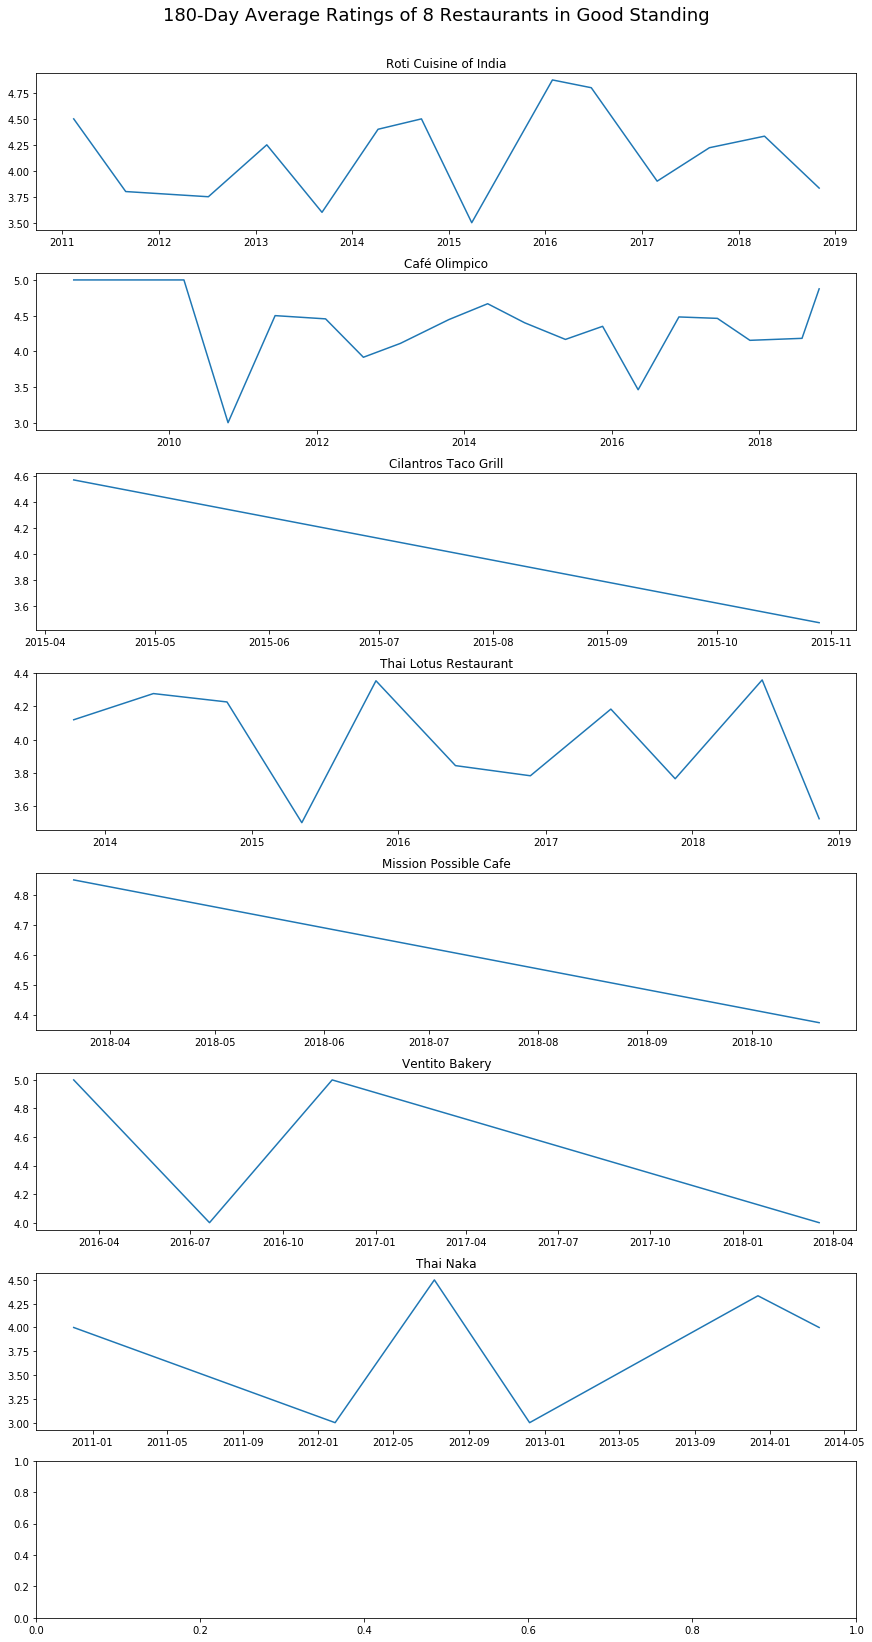

In [49]:
# Visualize the change in ratings for each restaurant that has reviews in time series line plots
fig2, axes2 = plt.subplots(8,1,figsize=(12,22),constrained_layout=True)
fig2.suptitle('180-Day Average Ratings of 8 Restaurants in Good Standing',size=18,y=1.03)
r = 0
for i in range(0,len(gmds)-1):
    tp = gmds[i]
    axes2[r].plot(tp[1],tp[0])
    rname = goodr[goodr['business_id']==ngrvs[i].iloc[0]['business_id']].iloc[0]['name']
    axes2[r].set_title(rname)
    r += 1
pass;

From the visualizations above, there is no apparent trend in the ratings for the restaurant in good standing. What about for restaurants in moderate standing?

In [400]:
# Sort the restaurants in moderate standing by stars and reviews in ascending order.
modr = modr.sort_values(['stars','review_count']).reset_index(drop=True)

In [50]:
# Randomly select 8 restaurants from those in moderate standing
mrs8 = modr[modr['business_id'].isin(modrv.business_id)].sample(n=8)
# Get the reviews for the randomly selected restaurants
mrvs = rest_reviews(mrs8,modrv)
# For each restaurant, pass the reviews to mean in range function 
# and obtain the means of the ratings for every 180 days
mmds = list()
nmrvs = list()
for rrv in mrvs:
    if len(rrv) > 0:
        rrv = rrv.sort_values('date').reset_index(drop=True)
        rrv = rrv.fillna(method='ffill')
        mmds.append(mean_in_range(180,rrv))
        nmrvs.append(rrv)


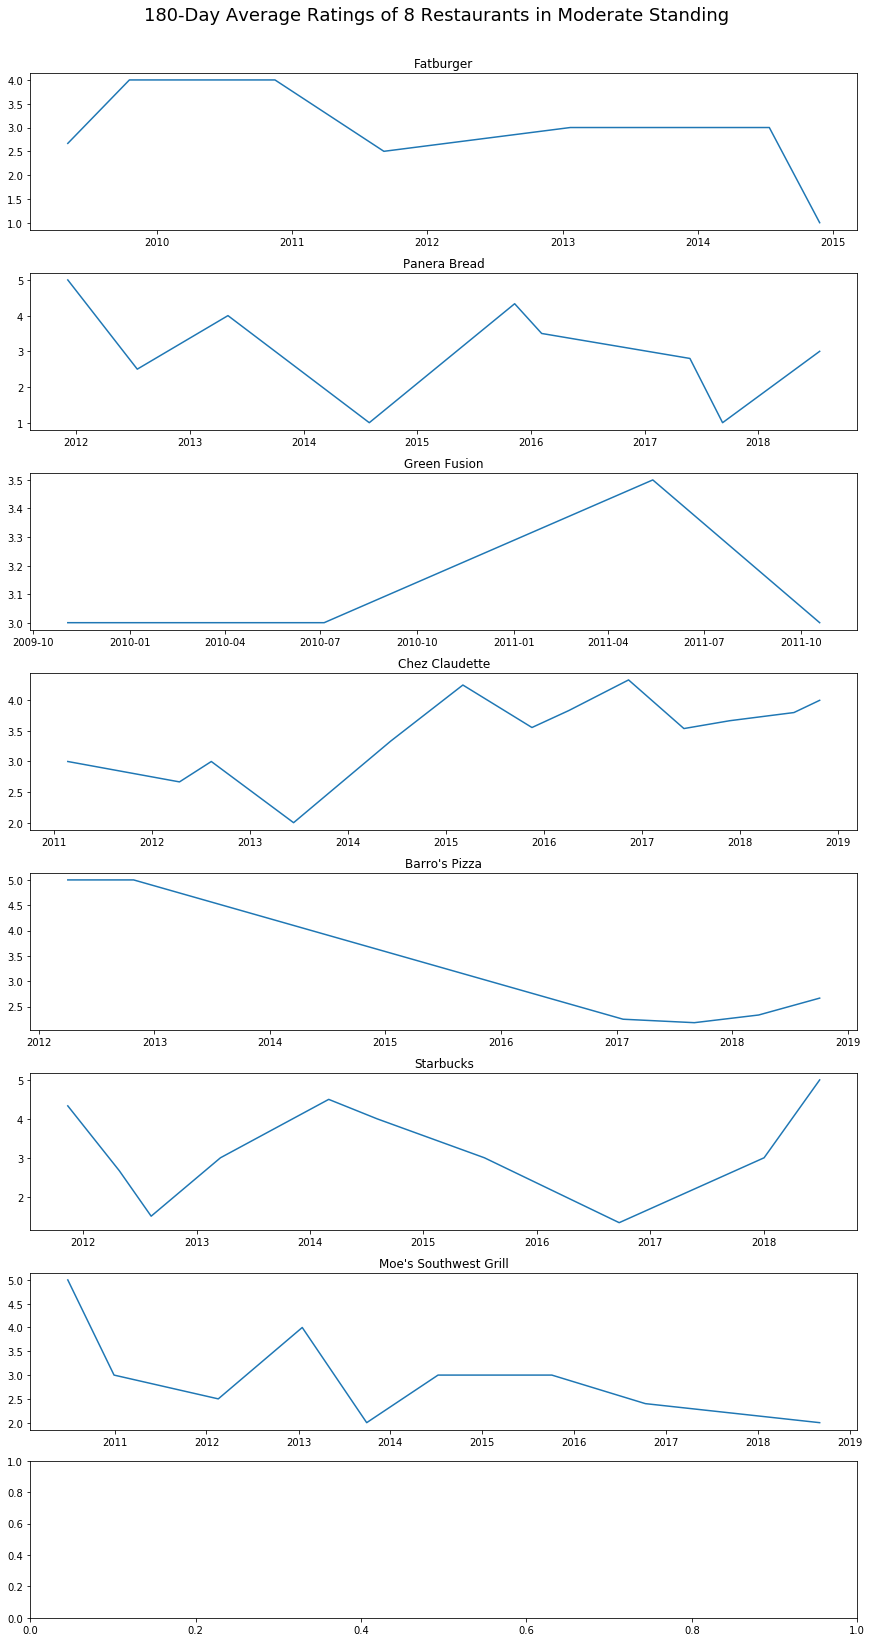

In [51]:
# Visualize the change in ratings for each restaurant in line plot
fig3, axes3 = plt.subplots(8,1,figsize=(12,22),constrained_layout=True)
fig3.suptitle('180-Day Average Ratings of 8 Restaurants in Moderate Standing',size=18,y=1.03)
r = 0
for i in range(0,len(mmds)-1):
    tp = mmds[i]
    axes3[r].plot(tp[1],tp[0])
    rname = modr[modr['business_id']==nmrvs[i].iloc[0]['business_id']].iloc[0]['name']
    axes3[r].set_title(rname)
    r += 1
pass;

Mixed results here as well and no apparent trend in the ratings. However, we may take note that the ratings here have a wider variance than those of the restaurants in good standing. What about the restaurants in poor standing?

In [404]:
# Sort the restaurants in poor standing by stars and reviews in ascending order.
poorr = poorr.sort_values(['stars','review_count']).reset_index(drop=True)


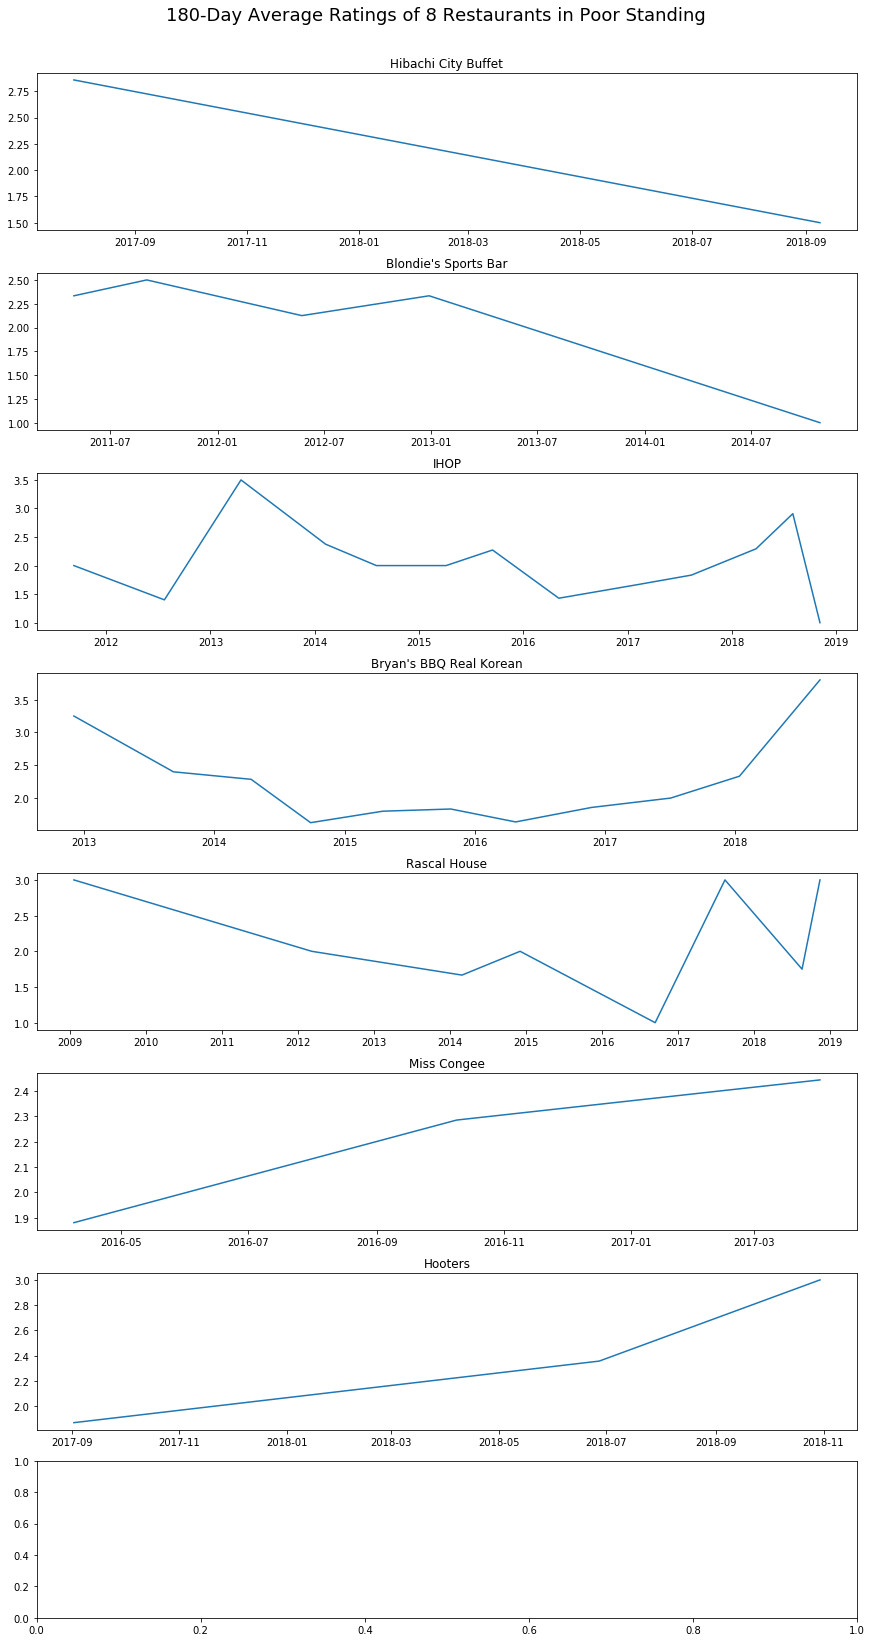

In [44]:
# Randomly select 8 restaurants from those in poor standing, skipping fast food chains
prs8 = poorr[~poorr['categories'].str.contains('Fast Food') & 
             ~poorr['name'].str.contains('Pizza') & 
             poorr['business_id'].isin(poorrv.business_id)].sample(n=8)
                                                                                                            
# Get the reviews for the randomly selected restaurants
prvs = rest_reviews(prs8,poorrv)
                                                                                                            
# For each restaurant, pass the reviews to mean in range function 
# and obtain the means of the ratings for every 180 days
pmds = list()
nprvs = list()
for rrv in prvs:
    if len(rrv) > 0:
        rrv = rrv.sort_values('date').reset_index(drop=True)
        rrv = rrv.fillna(method='ffill')
        pmds.append(mean_in_range(180,rrv))
        nprvs.append(rrv)

# Visualize the change in ratings for each restaurant in line plots
fig4, axes4 = plt.subplots(8,1,figsize=(12,22),constrained_layout=True)
fig4.suptitle('180-Day Average Ratings of 8 Restaurants in Poor Standing',size=18,y=1.03)
r = 0
for i in range(0,len(pmds)-1):
    tp = pmds[i]
    axes4[r].plot(tp[1],tp[0])
    rname = poorr[poorr['business_id']==nprvs[i].iloc[0]['business_id']].iloc[0]['name']
    axes4[r].set_title(rname)
    r += 1
pass;

For the randomly selected restaurants of poor standing, it looks like there are mixed trends. It would appear that there might not be any relationship between changes in rating and restaurant standing. To get a clearer picture, a time series analysis of larger populations of each standing category needs to be performed. 

We may take note of the restaurants in moderate standing having the widest variance in ratings over time compared to those in good and poor standing. More of them have ratings across the whole range of 1 to 5 stars than those in poor and good standings. In other words, the samples above suggest that mediocre restaurants perform more inconsistently over time. Let's verify this by looking at the variances of ratings in each standing category.

In [52]:
# Get the list of lists of ratings for the sampled restaurants in each standing category
gratings = [x for t in gmds for x in t[0]]
mratings = [x for t in mmds for x in t[0]]
pratings = [x for t in pmds for x in t[0]]

# Get the variance in ratings in each standing category
g_var = np.var(gratings,ddof=1)
m_var = np.var(mratings,ddof=1)
p_var = np.var(pratings,ddof=1)

In [53]:
print('Variance of ratings in sample of good restaurants = ' + str(g_var))
print('Variance of ratings in sample of moderate restaurants = ' + str(m_var))
print('Variance of ratings in sample of poor restaurants = ' + str(p_var))

Variance of ratings in sample of good restaurants = 0.2664437113671225
Variance of ratings in sample of moderate restaurants = 0.9480229502269333
Variance of ratings in sample of poor restaurants = 0.3551850041984566


The sample variances suggest that there is greater variance in ratings across time for a restaurant of moderate standing than those of a restaurant in good or poor standing.

## IV. Distribution of Restaurant Attributes by Standing

So far, we have explored the distribution of restaurants across standing categories and across star ratings, and drilled into those distributions by restaurant category. We found interesting restaurant categories where there exist significantly more restaurants in good standing than those in moderate and poor standing. We checked for trends and patterns in changes in ratings over time for samples of restaurants in each standing category. We compared the changes in ratings over time between the standing categories and found that the sample suggests that good restaurants perform most consistently over time. Now let's see if there is any relationship between restaurant standing and the attributes a restaurant possesses.

We will start by looking at the distribution of restaurants in each standing category for each attribute available. Below we list the attributes of particular interest where the distribution of restaurants differ more dramatically for one standing category versus another. We finish by plotting these attributes of interest in unstacked bar plots.

In [448]:
reservations_bystanding = rests.groupby('standing').RestaurantsReservations.value_counts(normalize=True)
reservations_bystanding

standing  RestaurantsReservations
Good      False                      0.579447
          True                       0.420089
          None                       0.000464
Moderate  False                      0.559729
          True                       0.439974
          None                       0.000297
Poor      False                      0.858022
          True                       0.141505
          None                       0.000473
Name: RestaurantsReservations, dtype: float64

In [444]:
outdoor_bystanding = rests.groupby('standing').OutdoorSeating.value_counts(normalize=True)
outdoor_bystanding

standing  OutdoorSeating
Good      False             0.565476
          True              0.433989
          None              0.000535
Moderate  False             0.578135
          True              0.421222
          None              0.000643
Poor      False             0.756134
          True              0.242864
          None              0.001002
Name: OutdoorSeating, dtype: float64

In [445]:
alcohol_bystanding = rests.groupby('standing').Alcohol.value_counts(normalize=True)
alcohol_bystanding

standing  Alcohol      
Good      none             0.462148
          full_bar         0.367852
          beer_and_wine    0.168526
          None             0.001473
Moderate  full_bar         0.466182
          none             0.388930
          beer_and_wine    0.144365
          None             0.000523
Poor      none             0.768799
          full_bar         0.169473
          beer_and_wine    0.061167
          None             0.000561
Name: Alcohol, dtype: float64

In [446]:
price_bystanding = rests.groupby('standing').RestaurantsPriceRange2.value_counts(normalize=True)
price_bystanding

standing  RestaurantsPriceRange2
Good      2                         0.535875
          1                         0.386010
          3                         0.064164
          4                         0.013759
          None                      0.000193
Moderate  2                         0.607816
          1                         0.334984
          3                         0.051240
          4                         0.005768
          None                      0.000192
Poor      1                         0.647717
          2                         0.328984
          3                         0.017707
          4                         0.005592
Name: RestaurantsPriceRange2, dtype: float64

In [447]:
noise_bystanding = rests.groupby('standing').NoiseLevel.value_counts(normalize=True)
noise_bystanding

standing  NoiseLevel
Good      average       0.696353
          quiet         0.243583
          loud          0.047267
          very_loud     0.011761
          None          0.001036
Moderate  average       0.691654
          quiet         0.174186
          loud          0.100905
          very_loud     0.032443
          None          0.000812
Poor      average       0.567818
          quiet         0.202219
          loud          0.138718
          very_loud     0.090012
          None          0.001233
Name: NoiseLevel, dtype: float64

Having reservations, alcohol, outdoor seating and noise level that is not very loud may be related to a restaurant being in better standing. A lot fewer restaurants in poor standing have reservations, alcohol and outdoor seating available. All three of those attributes require more complex management of and more investment in the restaurant. There are a lot more poor restaurants with loud to very loud noise level. Few restaurants in good standing have loud to very loud noise level. Price range does not seem to affect restaurant standing.

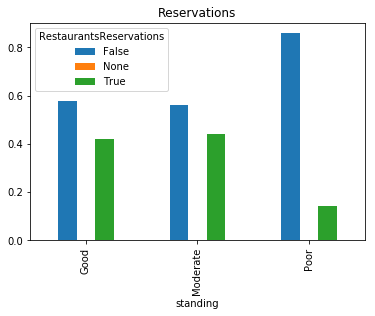

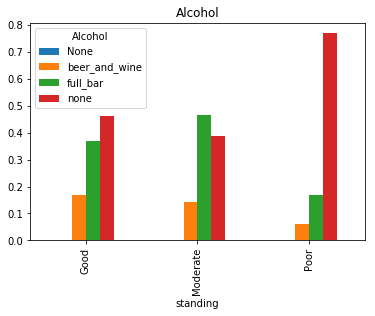

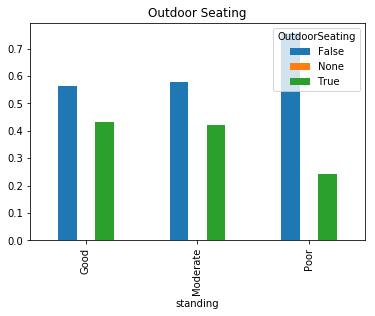

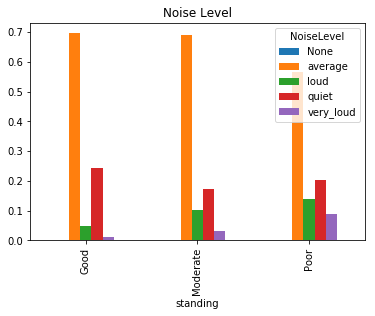

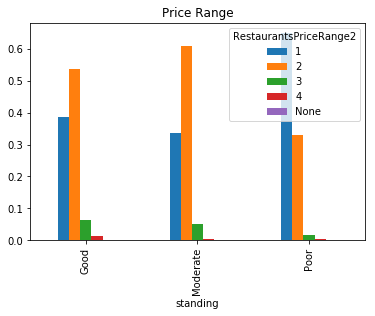

In [451]:
reservations_bystanding.unstack().plot(kind='bar').set_title('Reservations')
alcohol_bystanding.unstack().plot(kind='bar').set_title('Alcohol')
outdoor_bystanding.unstack().plot(kind='bar').set_title('Outdoor Seating')
noise_bystanding.unstack().plot(kind='bar').set_title('Noise Level')
price_bystanding.unstack().plot(kind='bar').set_title('Price Range');

## V. Distribution of Restaurant Standings by Location

Finally, let's utilize the latitude and longitude positions to see if there is any relationship between the location of the restaurant and its standing. We will start by creating a function that calculates the distance between two restaurants using their latitudes and longitudes.

In [455]:
# Create user defined function to calculate distance between two restaurants using latitudes and longitudes
from math import sin, cos, sqrt, atan2, radians

def rest_distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6378

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [454]:
# Sort the restaurants by position, stars and review count in ascending order
rests = rests.sort_values(['latitude','longitude','stars','review_count']).reset_index(drop=True)

Let's explore two possibilities with regards to restaurant location:
1. What is the relationship if any between restaurant standing and how many restaurants there are within one square kilometer of the restaurant? Does restaurant density impact restaurant standing? We can look at restaurants in a city like Las Vegas that is known for high restaurant density, calculate the density around each restaurant, and then compare the standings of those that are located in high density areas versus low density areas.

2. What is the relationship if any between the standing of a specific type of restaurant, for example chinese, and where it is located? Does a chinese restaurant have better chances at better ratings if it is in china town or if it is not surrounded by restaurants of the same type? We can look at chinese restaurants in a city that has a china town like New York, and compare those that are in china town versus those that are not close to other chinese restaurants.

In [473]:
# create user defined function for getting the restaurant density within one square km of a restaurant
def rest_density(restaurants):
    density = list()
    sqrkm_count = list()
    for lat, lon in zip(restaurants['latitude'],restaurants['longitude']):
        rd = 0
        for x, y in zip(restaurants['latitude'],restaurants['longitude']):
            dist = rest_distance(lat, lon, x, y)
            if 0 < dist <= 1:
                rd += 1
        sqrkm_count.append(rd)
        if rd >= 100:
            density.append('High')
        elif 40 < rd < 100:
            density.append('Medium')
        else:
            density.append('Low')
    restaurants['square_km_count'] = sqrkm_count
    restaurants['density'] = density
    return restaurants

In [474]:
# Get the restaurants in Las Vegas, there are 5310 of them
vegas = rests[rests['city']=='Las Vegas']
vegas = vegas.reset_index(drop=True)
# Call the density function with vegas dataframe to get the densities of restaurants
vegas = rest_density(vegas)

In [475]:
# Sort the restaurants in Las Vegas by density in descending order and reset the index
vegas = vegas.sort_values('square_km_count',ascending=False).reset_index(drop=True)

In [476]:
print('Restaurants in Las Vegas range in density from ' + str(vegas.square_km_count.max()) + ' to ' + str(vegas.square_km_count.min()))

Restaurants in Las Vegas range in density from 442 to 0


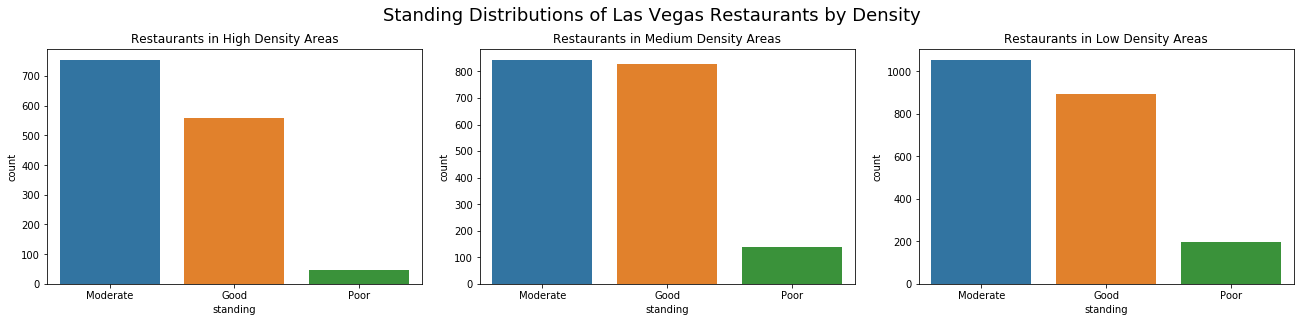

In [486]:
# Plot the standing distribution of restaurants in Las Vegas in each density area
fig5,axes5 = plt.subplots(1,3,figsize=(18,4),constrained_layout=True)
fig5.suptitle('Standing Distributions of Las Vegas Restaurants by Density',fontsize=18,y=1.08)
sns.countplot(x='standing',data=vegas[vegas['density']=='High'],ax=axes5[0]).set_title('Restaurants in High Density Areas')
sns.countplot(x='standing',data=vegas[vegas['density']=='Medium'],ax=axes5[1]).set_title('Restaurants in Medium Density Areas')
sns.countplot(x='standing',data=vegas[vegas['density']=='Low'],ax=axes5[2]).set_title('Restaurants in Low Density Areas');

The data in Las Vegas seems to suggest that a restaurant's location and its restaurant density has no relationship to the restaurant's standing and rating.

Next, we fly to New York and take a look at its Chinese restaurants.

In [492]:
# Get the Chinese restaurants in New York
nyc = rests[rests['city'] == 'New York']
nyc = rests[rests['categories'].str.contains('Chinese')]
nyc.reset_index(drop=True,inplace=True)
# Call the density function to determine the restaurant density around the Chinese restaurants in New York
nyc = rest_density(nyc)
nyc = nyc.sort_values('square_km_count',ascending=False).reset_index(drop=True)

In [496]:
print('Chinese restaurants in New York range in density from ' + str(nyc.square_km_count.max()) + ' to ' + str(nyc.square_km_count.min()))

Chinese restaurants in New York range in density from 117 to 0


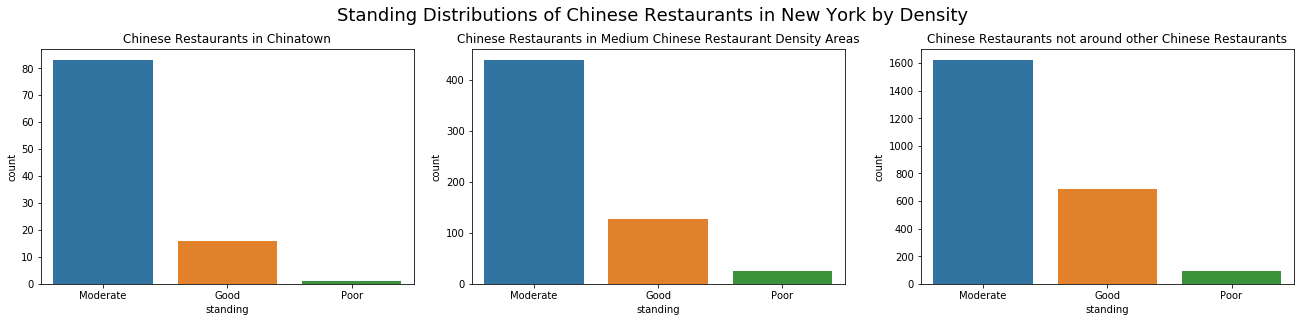

In [495]:
# Plot the standing distribution of Chinese restaurants in New York in each density area
nyc_med = nyc[nyc['square_km_count']<70]
nyc_med = nyc_med[nyc_med['square_km_count']>20]
fig6,axes6 = plt.subplots(1,3,figsize=(18,4),constrained_layout=True)
fig6.suptitle('Standing Distributions of Chinese Restaurants in New York by Density',fontsize=18,y=1.08)
sns.countplot(x='standing',data=nyc[nyc['square_km_count']>=70],ax=axes6[0]).set_title('Chinese Restaurants in Chinatown')
sns.countplot(x='standing',data=nyc_med,ax=axes6[1]).set_title('Chinese Restaurants in Medium Chinese Restaurant Density Areas')
sns.countplot(x='standing',data=nyc[nyc['square_km_count']<=20],ax=axes6[2]).set_title('Chinese Restaurants not around other Chinese Restaurants');

The data of New York's Chinese restaurants suggests that it might be more difficult to be in good standing if the restaurant is located around other restaurants of the same type, and it gets easier to be in good standing as you move away from restaurants of the same type.

## Summary

Yelp restaurant dataset contains significantly more restaurants in moderate and good standing than those in poor standing. Most restaurants have 3-4 stars in rating, with 1 star ratings being the rarest. 

Yelp has over 7000 categories for restaurants. Restaurants of type Vegetarian, Vegan, Food Truck, Cocktail, Dessert, Tacos, Juice, Coffee, and Ramen have standing distribtions that differ from that of the larger population. These categories contain more good restaurants than moderate and poor restaurants. If this infers any relationship between the level of ease of running a restaurant and the type of restaurant, new restauranteurs might benefit from knowing restaurants in what categories are easier to start up and manage. Perhaps keeping it simple with a food truck or focusing on beverages is the way to go for a new restauranteur in the business.

Moderate restaurants fluctuate widely in performance over time. Good restaurants tend of perform more consistently (good) over time and poor ones perform consistently poorly. The larger variances in ratings of moderate restaurants could suggest to future restauranteurs the importance and advantage of starting on the right foot, and the difficulty of improving consistency in performance once the restaurant is up and running. There seems to be no general trend in the changes in ratings for any of the standing categories.

Contrary to what one might think, price range does not seem to affect restaurant standing. However, having reservations, alcohol, and outdoor seating seems to be positively correlated with restaurant standing. These attributes point to the more complex management required of a restaurant, and the data suggests that restaurant standing reflects the time, energy, and money invested in the restaurant. Having these attributes and doing them right can improve a restaurant's standing.

While in general restaurant density isn't related to restaurant standing, it does when we narrowed in on a specific type of restaurant. A higher percentage of Chinese restaurants that are not close to other Chinese restaurants is in good standing. The percentage in good standing increases as a restaurant moves farther away from other Chinese restaurants. 

In [218]:
%store goodr
%store modr
%store poorr
%store goodr_checkins
%store modr_checkins
%store poorr_checkins
%store rests
%store poorrv
%store modrv
%store goodrv

Stored 'goodr' (DataFrame)
Stored 'modr' (DataFrame)
Stored 'poorr' (DataFrame)
Stored 'goodr_checkins' (DataFrame)
Stored 'modr_checkins' (DataFrame)
Stored 'poorr_checkins' (DataFrame)
Stored 'rests' (DataFrame)
Stored 'poorrv' (DataFrame)
Stored 'modrv' (DataFrame)
Stored 'goodrv' (DataFrame)
